<a href="https://colab.research.google.com/github/khalida-mujahid/ML-practice/blob/master/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pwd

/content


In [0]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar -O data.tar

--2019-03-09 15:03:14--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘data.tar’

data.tar              0%[                    ] 216.00K   511KB/s               ^C


In [0]:
import tarfile

f = tarfile.TarFile('/content/data.tar')
f.extractall('Data')

In [0]:
!ls Data/wiki_crop/

00  06	12  18	24  30	36  42	48  54	60  66	72  78	84  90	96
01  07	13  19	25  31	37  43	49  55	61  67	73  79	85  91	97
02  08	14  20	26  32	38  44	50  56	62  68	74  80	86  92	98
03  09	15  21	27  33	39  45	51  57	63  69	75  81	87  93	99
04  10	16  22	28  34	40  46	52  58	64  70	76  82	88  94	wiki.mat
05  11	17  23	29  35	41  47	53  59	65  71	77  83	89  95


In [0]:
from scipy.io import loadmat

In [0]:
Data = loadmat('/content/Data/wiki_crop/wiki.mat')
paths = Data['wiki']['full_path'][0][0][0][:]
labels = Data['wiki']['gender'][0][0][0][:]

In [0]:
import pandas as pd

Data = pd.DataFrame({"Paths": paths, "Labels": labels})
Data.head()

,Labels,Paths
0,1.0,[17/10000217_1981-05-05_2009.jpg]
1,1.0,[48/10000548_1925-04-04_1964.jpg]
2,1.0,[12/100012_1948-07-03_2008.jpg]
3,1.0,[65/10001965_1930-05-23_1961.jpg]
4,0.0,[16/10002116_1971-05-31_2012.jpg]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


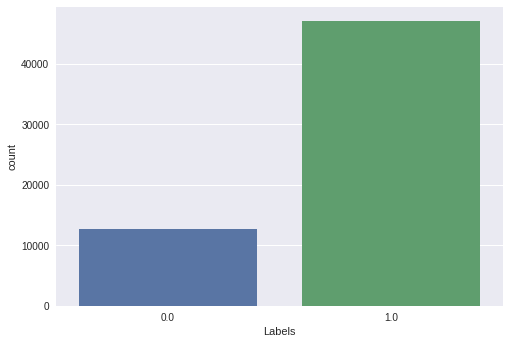

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(Data['Labels'])
plt.show()

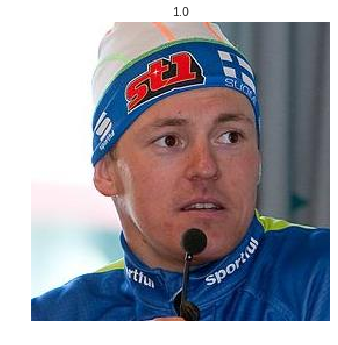

In [0]:
import cv2

img = cv2.imread("/content/Data/wiki_crop/" + Data['Paths'][0][0], -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(Data['Labels'][0])
plt.axis('off')
plt.show()

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Average

Using TensorFlow backend.


In [0]:
inp = Input(shape = (300, 300, 3))

# x1 = Conv2D(32, (5,5), activation = 'relu')(inp)
# x1 = Conv2D(32, (3,3), strides = 2, activation = 'relu')(x1)
# x1 = Conv2D(64, (3,3), strides = 3, activation = 'relu')(x1)
# x1 = Conv2D(128, (2,2), strides = 2, activation = 'relu')(x1)
# 25x25x128 = 80000 
x2 = Conv2D(64, (1,1), activation ='relu')(inp)
x2 = MaxPooling2D((2,2))(x2)

x2 = Conv2D(128, (1,1), activation ='relu')(x2)
x2 = MaxPooling2D((2,2))(x2)

x2 = Conv2D(256, (1,1), activation ='relu')(x2)
x2 = MaxPooling2D((2,2))(x2)
# 37.5x37.5x256 = 360000
# fc1 = Flatten()(x1)
fc2 = Flatten()(x2)

# fc1 = Dense(1024, activation = 'tanh')(fc1)
fc2 = Dense(1024, activation = 'tanh')(fc2)

# fc = Average()([fc1, fc2])
fc = Dense(512, activation ='tanh')(fc2)
opt1 = Dense(1, activation = 'sigmoid')(fc) # For binary crossentropy

opt2 = Dense(1)(fc) # For binary crossentropy

opt3 = Dense(10, activation = 'sigmoid')(fc)


# fc = Dense(2, acitvation = 'softmax') # For Catergorical Crossentropy

In [0]:
model = Model(inp, [opt1, opt3,opt2])

In [0]:
model.compile(loss = 'binary_crossentropy',
             optimizer =  'adam',
             metrics = ['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 128)     8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 256)       33024     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 256)       0         
__________

In [0]:
Data.Paths = Data.Paths.map(lambda x: x[0])

paths_male = Data.Paths[Data.Labels == 1.0][:5000]
paths_female = Data.Paths[Data.Labels == 0.0][:5000]


labels_male = Data.Labels[Data.Labels == 1.0][:5000]
labels_female = Data.Labels[Data.Labels == 0.0][:5000]

In [0]:
print(len(paths_male))
print(len(paths_female))

print(len(labels_male))
print(len(labels_female))

5000
5000
5000
5000


In [0]:
labels_female.head()

4     0.0
5     0.0
13    0.0
15    0.0
24    0.0
Name: Labels, dtype: float64

In [0]:
paths = list(paths_male.values.astype(str)) + list(paths_female.values.astype(str))
labels = list(labels_male.values) + list(labels_female.values)

In [0]:
print(len(labels))
print(len(paths))

10000
10000


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
paths_train, paths_test, labels_train, labels_test = train_test_split(paths, labels, test_size = 0.2, shuffle = True)

In [0]:
print(len(paths_train))
print(len(paths_test))

print(len(labels_train))
print(len(labels_test))

8000
2000
8000
2000


In [0]:
import cv2
import numpy as np
def load_data(paths):
  Images = list()
  
  for path in paths:
    full_path = '/content/Data/wiki_crop/' + path
    img = cv2.imread(full_path, 1)
    img = cv2.resize(img, (300,300))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255
    
    Images.append(img)
  return np.asarray(Images, dtype = 'uint8')

In [0]:
X_train = load_data(paths_train[:500])
X_train.shape

(500, 300, 300, 3)

In [0]:
X_test = load_data(paths_test[:50])
X_test.shape

(50, 300, 300, 3)

In [0]:
from tensorboardcolab import *

In [0]:
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://0deac008.ngrok.io


In [0]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", patience = 10)

In [0]:
model.fit(X_train, labels[:500], batch_size = 1, epochs = 10000,
         validation_split = 0.1, callbacks = [es, TensorBoardColabCallback(tbc)])

Train on 450 samples, validate on 50 samples


ResourceExhaustedError: ignored

In [0]:
!nvidia-smi

Sat Mar  9 15:53:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    59W / 149W |  10969MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  